## Telecom Churn - ML Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Main Objective :
## Predict which customers are at high risk of churn

## Steps which will take to complete the assignment


### 1. Reading the data.
### 2. Data Preparation. (Filling missing value, Creating Dummy Variables, Removing Outliers)
### 3. Finding High Value Customer.
### 4. Deriving New Features.
### 5. Exploratory Data Analysis (Univariate & Bivariate Analysis)
### 6. Model based on PCA
### 6. Other models like Decision Tree and Linear regression

## Finally suggest which model to use and what features are important in predicting the churn





## Step 1 : Rad and Clean the data 

In [1]:
## import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
## setting the display so that I can see all columns and rows required for understanding
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.8f}'.format

%config IPCompleter.greedy=True
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing additional libraries
import math
from sklearn.model_selection import train_test_split


In [4]:
## Read the file and get the feel for data

df_1 = pd.read_csv("telecom_churn_data.csv")

In [36]:
df_1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
df_1.size

22599774

In [6]:
df_1.shape

(99999, 226)

In [7]:
## we can simply drop some columns as they do not have meaningful value like
#last_date_of_month_6 -> all values are same so it will not tell any story whatsoever (0 variance)

#Expoloring all such columns with just one values 
unique = df_1.nunique()  # count the unique values in each column and it it is 1 then it is just one value
unique = unique[unique.values == 1]
print (unique)

### Safe to delete all such columns which have just one value in entire column
df_2 = df_1.drop(labels = list(unique.index), axis=1)
df_2.shape

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


(99999, 210)

In [349]:
## Exploring the null values

## total null values in each column
#df_2.isna().sum()

# Percentage of missing
df_2.isnull().mean()*100 

# Percentage of missing
#100*(df_2.isnull().sum()/df_2.shape[0])

mobile_number               0.00000000
arpu_6                      0.00000000
arpu_7                      0.00000000
arpu_8                      0.00000000
arpu_9                      0.00000000
onnet_mou_6                 3.93703937
onnet_mou_7                 3.85903859
onnet_mou_8                 5.37805378
onnet_mou_9                 7.74507745
offnet_mou_6                3.93703937
offnet_mou_7                3.85903859
offnet_mou_8                5.37805378
offnet_mou_9                7.74507745
roam_ic_mou_6               3.93703937
roam_ic_mou_7               3.85903859
roam_ic_mou_8               5.37805378
roam_ic_mou_9               7.74507745
roam_og_mou_6               3.93703937
roam_og_mou_7               3.85903859
roam_og_mou_8               5.37805378
roam_og_mou_9               7.74507745
loc_og_t2t_mou_6            3.93703937
loc_og_t2t_mou_7            3.85903859
loc_og_t2t_mou_8            5.37805378
loc_og_t2t_mou_9            7.74507745
loc_og_t2m_mou_6         

There are some important columns where values are null but can be imputed like adding 0 in total_rech_data_6


In [300]:
df_2.total_rech_data_6.describe()

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

In [8]:
df_2.total_rech_data_6 = df_2.total_rech_data_6.fillna(0)

In [9]:
## finding the recharge amount column
## so getting all columns where I can impute 0 for null.

print(df_2.filter(like='rech').columns)


Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], dtype='object')


In [10]:
fillcolms = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 
        'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [11]:

for col in fillcolms:
    df_2[col] = df_2[col].fillna(0)

In [11]:
# Percentage of missing
df_2.isnull().mean()*100 

mobile_number               0.00000000
arpu_6                      0.00000000
arpu_7                      0.00000000
arpu_8                      0.00000000
arpu_9                      0.00000000
onnet_mou_6                 3.93703937
onnet_mou_7                 3.85903859
onnet_mou_8                 5.37805378
onnet_mou_9                 7.74507745
offnet_mou_6                3.93703937
offnet_mou_7                3.85903859
offnet_mou_8                5.37805378
offnet_mou_9                7.74507745
roam_ic_mou_6               3.93703937
roam_ic_mou_7               3.85903859
roam_ic_mou_8               5.37805378
roam_ic_mou_9               7.74507745
roam_og_mou_6               3.93703937
roam_og_mou_7               3.85903859
roam_og_mou_8               5.37805378
roam_og_mou_9               7.74507745
loc_og_t2t_mou_6            3.93703937
loc_og_t2t_mou_7            3.85903859
loc_og_t2t_mou_8            5.37805378
loc_og_t2t_mou_9            7.74507745
loc_og_t2m_mou_6         

### Handelling the categorical varaible

In [12]:
## Getting the feel

#df_2.night_pck_user_7.describe()
df_2.night_pck_user_7.unique()
df_2.night_pck_user_7.unique()

array([ 0., nan,  1.])

In [13]:
## apply the change
# - please note _9 has to be deleted anyway so not treating that here.

categorical_vars = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']


for colm in categorical_vars:
     df_2[colm].fillna('0',inplace=True)  # add 0 for missing


for colm in categorical_vars:
    cat_col = pd.get_dummies(df_2[colm],prefix=colm,drop_first=True)
    df_2 = pd.concat([df_2,cat_col],axis=1)

In [355]:
df_2.head(4)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0
0,7000842753,197.38500000,214.81600000,213.80300000,21.10000000,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,0.00000000,0.00000000,0.00000000,0.00000000,nan,nan,0.16000000,nan,nan,nan,4.13000000,nan,nan,nan,1.15000000,nan,nan,nan,5.44000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,0.00000000,0.00000000,5.44000000,0.00000000,nan

In [14]:
# drop the categorical vars now
df_3 = df_2.drop(categorical_vars,axis=1)
df_3.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0
0,7000842753,197.38500000,214.81600000,213.80300000,21.10000000,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,0.00000000,0.00000000,0.00000000,0.00000000,nan,nan,0.16000000,nan,nan,nan,4.13000000,nan,nan,nan,1.15000000,nan,nan,nan,5.44000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,0.00000000,0.00000000,5.44000000,0.00000000,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,nan,nan,0.00000000,nan,4,3,2,6,362,252

In [15]:
# Percentage of missing
df_3.isnull().mean()*100 

mobile_number               0.00000000
arpu_6                      0.00000000
arpu_7                      0.00000000
arpu_8                      0.00000000
arpu_9                      0.00000000
onnet_mou_6                 3.93703937
onnet_mou_7                 3.85903859
onnet_mou_8                 5.37805378
onnet_mou_9                 7.74507745
offnet_mou_6                3.93703937
offnet_mou_7                3.85903859
offnet_mou_8                5.37805378
offnet_mou_9                7.74507745
roam_ic_mou_6               3.93703937
roam_ic_mou_7               3.85903859
roam_ic_mou_8               5.37805378
roam_ic_mou_9               7.74507745
roam_og_mou_6               3.93703937
roam_og_mou_7               3.85903859
roam_og_mou_8               5.37805378
roam_og_mou_9               7.74507745
loc_og_t2t_mou_6            3.93703937
loc_og_t2t_mou_7            3.85903859
loc_og_t2t_mou_8            5.37805378
loc_og_t2t_mou_9            7.74507745
loc_og_t2m_mou_6         

In [15]:
fillremcols = ['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [16]:
for col in fillremcols:
    df_3[col] = df_3[col].fillna(0)

In [18]:
# Percentage of missing
df_3.isnull().mean()*100 

mobile_number               0.00000000
arpu_6                      0.00000000
arpu_7                      0.00000000
arpu_8                      0.00000000
arpu_9                      0.00000000
onnet_mou_6                 3.93703937
onnet_mou_7                 3.85903859
onnet_mou_8                 5.37805378
onnet_mou_9                 7.74507745
offnet_mou_6                3.93703937
offnet_mou_7                3.85903859
offnet_mou_8                5.37805378
offnet_mou_9                7.74507745
roam_ic_mou_6               3.93703937
roam_ic_mou_7               3.85903859
roam_ic_mou_8               5.37805378
roam_ic_mou_9               7.74507745
roam_og_mou_6               3.93703937
roam_og_mou_7               3.85903859
roam_og_mou_8               5.37805378
roam_og_mou_9               7.74507745
loc_og_t2t_mou_6            3.93703937
loc_og_t2t_mou_7            3.85903859
loc_og_t2t_mou_8            5.37805378
loc_og_t2t_mou_9            7.74507745
loc_og_t2m_mou_6         

#### Dropping dates columns here. below is reasoning:
#### Ddata is already in months of 6, 7 8 and 9, there is not much value of dates as a seperate column I see.
#### So dropping the date column here

In [ ]:
#date_of_last_rech_data_6    
#date_of_last_rech_data_7
#date_of_last_rech_data_8
#date_of_last_rech_data_9    
#date_of_last_rech_6
#date_of_last_rech_7
#date_of_last_rech_8
#date_of_last_rech_9

In [17]:

columns_to_drop=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                 'date_of_last_rech_data_9',
                'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                'date_of_last_rech_9']

df_4 = df_3.drop(columns_to_drop,1)

In [21]:
# Percentage of missing
df_4.isnull().mean()*100 

mobile_number           0.00000000
arpu_6                  0.00000000
arpu_7                  0.00000000
arpu_8                  0.00000000
arpu_9                  0.00000000
onnet_mou_6             3.93703937
onnet_mou_7             3.85903859
onnet_mou_8             5.37805378
onnet_mou_9             7.74507745
offnet_mou_6            3.93703937
offnet_mou_7            3.85903859
offnet_mou_8            5.37805378
offnet_mou_9            7.74507745
roam_ic_mou_6           3.93703937
roam_ic_mou_7           3.85903859
roam_ic_mou_8           5.37805378
roam_ic_mou_9           7.74507745
roam_og_mou_6           3.93703937
roam_og_mou_7           3.85903859
roam_og_mou_8           5.37805378
roam_og_mou_9           7.74507745
loc_og_t2t_mou_6        3.93703937
loc_og_t2t_mou_7        3.85903859
loc_og_t2t_mou_8        5.37805378
loc_og_t2t_mou_9        7.74507745
loc_og_t2m_mou_6        3.93703937
loc_og_t2m_mou_7        3.85903859
loc_og_t2m_mou_8        5.37805378
loc_og_t2m_mou_9    

In [18]:
## though these columns will be deleted later on, for now let's fill null values so that data gets clean

fillremcols = ['night_pck_user_9','fb_user_9']

In [19]:
for col in fillremcols:
    df_4[col] = df_4[col].fillna(0)

In [24]:
# Percentage of missing
df_4.isnull().mean()*100 

mobile_number          0.00000000
arpu_6                 0.00000000
arpu_7                 0.00000000
arpu_8                 0.00000000
arpu_9                 0.00000000
onnet_mou_6            3.93703937
onnet_mou_7            3.85903859
onnet_mou_8            5.37805378
onnet_mou_9            7.74507745
offnet_mou_6           3.93703937
offnet_mou_7           3.85903859
offnet_mou_8           5.37805378
offnet_mou_9           7.74507745
roam_ic_mou_6          3.93703937
roam_ic_mou_7          3.85903859
roam_ic_mou_8          5.37805378
roam_ic_mou_9          7.74507745
roam_og_mou_6          3.93703937
roam_og_mou_7          3.85903859
roam_og_mou_8          5.37805378
roam_og_mou_9          7.74507745
loc_og_t2t_mou_6       3.93703937
loc_og_t2t_mou_7       3.85903859
loc_og_t2t_mou_8       5.37805378
loc_og_t2t_mou_9       7.74507745
loc_og_t2m_mou_6       3.93703937
loc_og_t2m_mou_7       3.85903859
loc_og_t2m_mou_8       5.37805378
loc_og_t2m_mou_9       7.74507745
loc_og_t2f_mou

#### only few percentage are missing for some column soo will use Iterative Imputer to clean the data further
#### I understand it will take time, but this is low missing field so should be doable

In [20]:
from fancyimpute import IterativeImputer

## I have install this using pip command (%pip install fancyimpute)

Using TensorFlow backend.


In [21]:
# Preserve the column names
df_4_col = df_4.columns

In [22]:
df_clean = pd.DataFrame(IterativeImputer().fit_transform(df_4))
df_clean.columns = df_4_col
df_clean.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0
0,7000842753.00000000,197.38500000,214.81600000,213.80300000,21.10000000,-45.71968845,-17.06370053,0.00000000,-32.86871397,186.49580186,174.54850456,0.00000000,172.50181568,30.93647992,22.02387874,0.00000000,22.16252047,13.92418402,5.03111014,0.00000000,3.62945163,41.22527499,27.83199705,0.00000000,35.14764735,93.30301285,91.38218703,0.00000000,90.39573656,3.78501200,3.80329271,0.00000000,3.70611309,-7.96587430,-14.45328149,0.00000000,-10.69605301,5.34997937,-12.02019628,0.00000000,-21.03390049,92.42247516,94.00752192,0.00000000,94.77191678,87.15834885,90.61057044,0.00000000,86.31788127,1.18853185,1.18098157,0.00000000,1.07151542,120.90249303,126.90269114,0.00000000,121.92524713,-115.71812146,-103.87314080,0.00000000,-98.18998673,3.91303837,4.97519920,0.00000000,4.40782180,0.44759626,0.04481952,0.00000000,0.04748466,0.00000000,0.00000000,0.00000000,0.00000000,52.93288144,40.86139622,0.16000000,58.52561556,107.48381265,107.11692081,4.13000000,106.17360152

In [28]:
# Percentage of missing
df_clean.isnull().mean()*100 

mobile_number          0.00000000
arpu_6                 0.00000000
arpu_7                 0.00000000
arpu_8                 0.00000000
arpu_9                 0.00000000
onnet_mou_6            0.00000000
onnet_mou_7            0.00000000
onnet_mou_8            0.00000000
onnet_mou_9            0.00000000
offnet_mou_6           0.00000000
offnet_mou_7           0.00000000
offnet_mou_8           0.00000000
offnet_mou_9           0.00000000
roam_ic_mou_6          0.00000000
roam_ic_mou_7          0.00000000
roam_ic_mou_8          0.00000000
roam_ic_mou_9          0.00000000
roam_og_mou_6          0.00000000
roam_og_mou_7          0.00000000
roam_og_mou_8          0.00000000
roam_og_mou_9          0.00000000
loc_og_t2t_mou_6       0.00000000
loc_og_t2t_mou_7       0.00000000
loc_og_t2t_mou_8       0.00000000
loc_og_t2t_mou_9       0.00000000
loc_og_t2m_mou_6       0.00000000
loc_og_t2m_mou_7       0.00000000
loc_og_t2m_mou_8       0.00000000
loc_og_t2m_mou_9       0.00000000
loc_og_t2f_mou

#### Data is clean now without any null values etc.
#### Outlier treatment and data conversion to numbers so that we can further improve the data for modeling

In [ ]:
## let's convert all columns to numeric for easy analysis and EDA

In [23]:
all_colmns = list(df_clean.columns)

In [24]:
all_colmns.remove('mobile_number')
colms_to_covert=all_colmns

In [25]:
for colmn in colms_to_covert:
    df_clean[colmn] = df_clean[colmn].astype(float)

In [26]:
df_clean.shape


(99999, 208)

In [27]:
telecom_clean_df = df_clean

#### Outlier finding and treatment

In [28]:
outlier_range  = (0.0001, 0.9999)

# Check data at various milestome like at 25%, 50% and 99% to see if there are  outliers
telecom_clean_df[colms_to_covert].describe(percentiles=[outlier_range[0],.25,.5,.75,.90,.95,.99, outlier_range[1]])



,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0
count,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,99999.00000000,9

##### Looking at data above, it is quite obious there are some outliers, Let's plot box plot to makesure


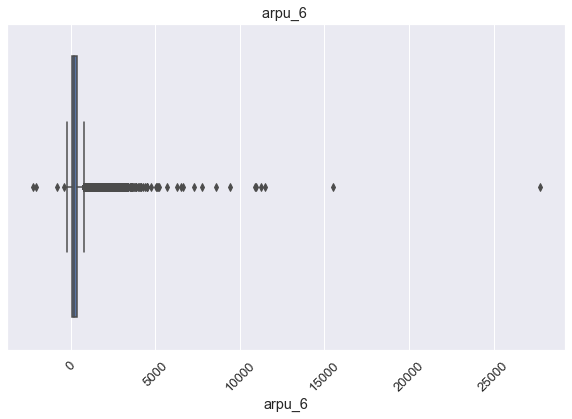

In [29]:
# Lets check one of the variables with box plot 
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.boxplot(data =telecom_clean_df, x='arpu_6')
plt.title('arpu_6 ')
plt.xticks(rotation=45)
plt.show()

#### Looking at this box plot along with data earlier it is very clear that there are some outlier.
#### we must remove them as PCA does not work with outlier and also other models need data without outlier


In [30]:
## will keep the outlier range bit wide so that we dont loose actual data trend
outlier_range  = (0.0001, 0.9999) 

In [31]:
def df_withoutOL (df, column):
    q1 = df[column].quantile(outlier_range[0])
    q3 = df[column].quantile(outlier_range[1])
    in_range_data = (df[column] >= q1) & (df[column] <= q3)
    return df.loc[in_range_data]

for c in colms_to_covert:
    telecom_clean_df = df_withoutOL(telecom_clean_df, c)



In [32]:
telecom_clean_df[colms_to_covert].describe(percentiles=[outlier_range[0],.25,.5,.75,.90,.95,.99, outlier_range[1]])

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0
count,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,97829.00000000,9

#### Data looks much balance now.
#### second step is to filter the data for HVC


In [33]:
telecom_clean_df.shape

(97829, 208)

In [34]:
## store the data in new dataframe

telecom_hvc_df = telecom_clean_df

In [35]:
total_good_avg_recharge = telecom_hvc_df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [36]:
X = np.percentile(total_good_avg_recharge, 70)
print (X)

360.5


### As per problem statement we need to work on only high value customer
### so filtering the data for high value customer
### we are achiveing this by considering recharge amount  for 6 and 7 months (being condered good months)

In [37]:
telecom_hvc_df = telecom_hvc_df[total_good_avg_recharge >= X]
telecom_hvc_df.shape

(29361, 208)

In [38]:
## save the filtered data (we are getting close to 29.9K records) so will go ahead with this.
hvc_df = telecom_hvc_df

In [39]:
hvc_df.size

6107088

In [40]:
hvc_df.shape

(29361, 208)

In [41]:
hvc_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0
6,7001051193.00000000,429.02300000,190.70400000,255.11400000,114.75100000,71.03000000,45.03000000,76.66000000,15.23000000,262.73000000,49.24000000,92.08000000,50.33000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,71.03000000,45.03000000,76.14000000,15.23000000,252.23000000,48.71000000,80.63000000,50.33000000,10.38000000,0.00000000,0.00000000,0.00000000,0.11000000,0.00000000,0.00000000,0.00000000,333.64000000,93.74000000,156.78000000,65.56000000,0.00000000,0.00000000,0.51000000,0.00000000,0.00000000,0.53000000,11.45000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.53000000,11.96000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11000000,0.53000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.35000000,333.76000000,94.81000000,168.74000000,65.91000000,1857.99000000,1427.04000000,1896.43000000,2334.88000000,248.64000000,336.96000000,265.28000000,231.41000000,20.24

now we have clean data filtered for HVC.
Need to create Y column (Churn)

### Create Y column (CHURN)

In [42]:
### as per assigment criteria we need to consider these 4 feature
### total_ic_mou_9 , total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

hvc_df['churned'] = hvc_df.apply(lambda row : 
                         1 if (
                             row.total_ic_mou_9 == 0.0 and 
                             row.total_og_mou_9 == 0.0 and 
                             row.vol_2g_mb_9 == 0.0 and 
                             row.vol_3g_mb_9 == 0.0
                         ) 
                         else 
                         0, 
                         axis=1
                        )



In [48]:
hvc_df.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned
6,7001051193.00000000,429.02300000,190.70400000,255.11400000,114.75100000,71.03000000,45.03000000,76.66000000,15.23000000,262.73000000,49.24000000,92.08000000,50.33000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,71.03000000,45.03000000,76.14000000,15.23000000,252.23000000,48.71000000,80.63000000,50.33000000,10.38000000,0.00000000,0.00000000,0.00000000,0.11000000,0.00000000,0.00000000,0.00000000,333.64000000,93.74000000,156.78000000,65.56000000,0.00000000,0.00000000,0.51000000,0.00000000,0.00000000,0.53000000,11.45000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.53000000,11.96000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11000000,0.53000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.35000000,333.76000000,94.81000000,168.74000000,65.91000000,1857.99000000,1427.04000000,1896.43000000,2334.88000000,248.64000000,336.96000000,265.28000000,231.410000

In [43]:
churn = (sum(hvc_df['churned'])/len(hvc_df['churned'].index))*100

churn

8.524914001566703

####  so around 9 percent only churned out, need to plan for data imbalance

In [44]:
# remove  all  with '_9' as per assignment objective
hvc_df2 = hvc_df.drop(columns = [col for col in hvc_df.columns if '_9' in col])
print (hvc_df2.shape)
hvc_df2.head(3)

(29361, 160)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned
6,7001051193.00000000,429.02300000,190.70400000,255.11400000,71.03000000,45.03000000,76.66000000,262.73000000,49.24000000,92.08000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,71.03000000,45.03000000,76.14000000,252.23000000,48.71000000,80.63000000,10.38000000,0.00000000,0.00000000,0.11000000,0.00000000,0.00000000,333.64000000,93.74000000,156.78000000,0.00000000,0.00000000,0.51000000,0.00000000,0.53000000,11.45000000,0.00000000,0.00000000,0.00000000,0.00000000,0.53000000,11.96000000,0.00000000,0.00000000,0.00000000,0.11000000,0.53000000,0.00000000,0.00000000,0.00000000,0.00000000,333.76000000,94.81000000,168.74000000,1857.99000000,1427.04000000,1896.43000000,248.64000000,336.96000000,265.28000000,20.24000000,22.69000000,2.51000000,2126.89000000,1786.71000000,2164.23000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,2128.41000000,1788.06000000,2167.11000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11000000,0.58000000,0.28000000,15.00000000,10.00000000,11.00000000,499.00000000,222.00000000,294.00000000,90.00000000,37.00000000,50.00000000,37.00000000,24.00000000,10.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1673.00000000,0.0

## Derive New feature for better usage of data

In [51]:
#hvc_df2.av_rech_amt_data_6.describe()
hvc_df2.total_rech_data_6.describe()

count   29361.00000000
mean        0.85593134
std         1.80104221
min         0.00000000
25%         0.00000000
50%         0.00000000
75%         1.00000000
max        26.00000000
Name: total_rech_data_6, dtype: float64

In [45]:
##as total_rech_data_(6,7) is number of recharge, we can use below for amount

## 1

# total amount = total number of recharges * avg amount
hvc_df2['total_data_rech_6'] = hvc_df2['total_rech_data_6'] * hvc_df2['av_rech_amt_data_6']
hvc_df2['total_data_rech_7'] = hvc_df2['total_rech_data_7'] * hvc_df2['av_rech_amt_data_7']

#Further adding them to data to get total amount spend by a customer
hvc_df2['total_amt_6'] = hvc_df2['total_rech_amt_6'] + hvc_df2['total_data_rech_6']
hvc_df2['total_amt_7'] = hvc_df2['total_rech_amt_7'] + hvc_df2['total_data_rech_7']

#Now take averge for good months (6 and 7 )
hvc_df2['avg_amt_6_7'] = hvc_df2[['total_amt_6', 'total_amt_7']].mean(axis=1)


In [460]:
hvc_df2.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,total_good_avg_recharge,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7
8,7001524846.00000000,378.72100000,492.22300000,137.36200000,413.69000000,351.03000000,35.08000000,94.66000000,80.63000000,136.48000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,297.13000000,217.59000000,12.49000000,80.96000000,70.58000000,50.54000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,7.15000000,378.09000000,288.18000000,63.04000000,116.56000000,133.43000000,22.58000000,13.69000000,10.04000000,75.69000000,0.00000000,0.00000000,0.00000000,130.26000000,143.48000000,98.28000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10.23000000,0.00000000,0.00000000,0.00000000,508.36000000,431.66000000,171.56000000,23.84000000,9.84000000,0.31000000,57.58000000,13.98000000,15.48000000,0.00000000,0.00000000,0.00000000,81.43000000,23.83000000,15.79000000,0.00000000,0.58000000,0.10000000,22.43000000,4.08000000,0.65000000,0.00000000,0.00000000,0.00000000,22.43000000,4.66000000,0.75000000,103.86000000,28.49000000,16.54000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,19.00000000,21.00000000,14.00000000,437.00000000,601.00000000,120.00000000,90.00000000,154.00000000,30.00000000,50.00000000,0.00000000,10.00000000,0.00000000,2.00000000,3.00000000,0.00000000,154.00000000,23.00000000,0.00000000,2.00000000,3.00000000,0.00000000,0.00000000,0.00000000,0.00000000,177.00000000,69.00000000,0.00000000,356.00000000,0.03000000,0.00000000,750.95000000,11.94000000,0.00000000,0.00000000,19.83000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00

In [46]:
## 2

#Average outgoing calls for 6th and 7th month
hvc_df2['avg_og_mou_6_7'] = hvc_df2[['total_og_mou_6', 'total_og_mou_7']].mean(axis=1)

#see the gap from aveg to 8th month to get insight of customers who are about to churn.
hvc_df2['usage_diff_og_mou'] = hvc_df2['avg_og_mou_6_7'] - hvc_df2['total_og_mou_8']

hvc_df2 = hvc_df2.drop(['avg_og_mou_6_7'], axis=1)

In [132]:
##AON    	Age on network - number of days the customer is using the operator T network
## this should  be important feature

hvc_df2.aon.describe()

count   29361.00000000
mean     1269.96560063
std       977.69207332
min       180.00000000
25%       480.00000000
50%       921.00000000
75%      1944.00000000
max      4197.00000000
Name: aon, dtype: float64

In [47]:
# Convert Age from days to months in months
## I am using 30.417 average days in a month.
hvc_df2['aon'] = hvc_df2['aon']/30.417

In [55]:
hvc_df2['aon'].head()

6    55.00213696
8    10.35605089
13   85.70864977
16   16.79981589
17   21.92852681
Name: aon, dtype: float64

In [ ]:
## 3

#user type as per usage on 2g, 3g etc


In [48]:
def find_2g_user(df):
    return df['vol_2g_mb_8']>0 or df['monthly_2g_8']>0 or df['sachet_2g_8']>0

hvc_df2['2g_user'] = hvc_df2.apply(find_2g_user, axis=1)

def find_3g_user(df):
    return df[ 'vol_3g_mb_8']>0 or df[ 'monthly_3g_8']>0 or df[ 'sachet_3g_8']>0 or df[ 'aug_vbc_3g']>0

hvc_df2['3g_user'] = hvc_df2.apply(find_3g_user, axis=1)


def user_type(df):
    if df['2g_user']:
        return '2g'
    elif df['3g_user']:
        return '3g'
    else:
        return 'both'
hvc_df2['user_type'] = hvc_df2.apply(user_type, axis=1)
hvc_df2 = hvc_df2.drop(['2g_user','3g_user'], axis=1)

In [ ]:
## 4
## what type of service being used

In [49]:
def find_monthly_user(df):
    return df['monthly_2g_8']>0 or df['monthly_3g_8']>0

hvc_df2['monthly_user'] = hvc_df2.apply(find_monthly_user, axis=1)

def find_sachet_user(df):
    return df[ 'sachet_2g_8']>0 or df[ 'sachet_3g_8']>0

hvc_df2['sachet_user'] = hvc_df2.apply(find_sachet_user, axis=1)

def find_fb_user(df):
    return df['fb_user_8_1.0']>0    # when we converted to dummies

hvc_df2['fb_user'] = hvc_df2.apply(find_fb_user, axis=1)

def find_night_user(df):
    return df['night_pck_user_8_1.0']>0    # when we converted to dummies

hvc_df2['night_user'] = hvc_df2.apply(find_night_user, axis=1)

def find_service_type(df):
    if df['monthly_user']:
        return 'monthly'
    elif df['sachet_user']:
        return 'sachet'
    elif df['fb_user']:
        return 'fb'
    elif df['night_user']:
        return 'night'
    else:
        return 'none'
    
hvc_df2['service_type'] = hvc_df2.apply(find_service_type, axis=1)
hvc_df2 = hvc_df2.drop(['monthly_user','sachet_user','fb_user','night_user'], axis=1)

In [50]:
## saving teh dataframe for EDA now
hvc_df3 = hvc_df2

In [51]:
hvc_df3.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,user_type,service_type
6,7001051193.00000000,429.02300000,190.70400000,255.11400000,71.03000000,45.03000000,76.66000000,262.73000000,49.24000000,92.08000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,71.03000000,45.03000000,76.14000000,252.23000000,48.71000000,80.63000000,10.38000000,0.00000000,0.00000000,0.11000000,0.00000000,0.00000000,333.64000000,93.74000000,156.78000000,0.00000000,0.00000000,0.51000000,0.00000000,0.53000000,11.45000000,0.00000000,0.00000000,0.00000000,0.00000000,0.53000000,11.96000000,0.00000000,0.00000000,0.00000000,0.11000000,0.53000000,0.00000000,0.00000000,0.00000000,0.00000000,333.76000000,94.81000000,168.74000000,1857.99000000,1427.04000000,1896.43000000,248.64000000,336.96000000,265.28000000,20.24000000,22.69000000,2.51000000,2126.89000000,1786.71000000,2164.23000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,2128.41000000,1788.06000000,2167.11000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11000000,0.58000000,0.28000000,15.00000000,10.00000000,11.00000000,499.00000000,222.00000000,294.00000000,90.00000000,37.00000000,50.00000000,37.00000000,24.00000000,10.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0

# Step 5 EDA 

## we believe we have enough categorial and derived features for EDA.
## we will explore key features during EDA 

### Idea is to analyse key features against Churn value to see how they impact churning

## Univariate Analysis

In [52]:
## common function to plot for each feature
def univariate_plot(df,col,lbl,title):
    sns.distplot(df[col])
    plt.xlabel(lbl)
    plt.title(title)
    plt.show()

In [53]:
hvc_df3[hvc_df3['churned']==1]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,user_type,service_type
97,7000589828.00000000,374.86300000,294.02300000,183.04300000,433.59000000,415.66000000,221.06000000,74.54000000,43.66000000,31.86000000,0.00000000,0.00000000,6.16000000,0.00000000,0.00000000,23.91000000,2.83000000,16.19000000,9.73000000,16.99000000,23.14000000,17.79000000,3.54000000,1.46000000,1.83000000,0.40000000,0.00000000,0.00000000,23.38000000,40.81000000,29.36000000,430.76000000,399.46000000,191.31000000,53.59000000,13.81000000,8.33000000,0.00000000,0.00000000,0.00000000,484.36000000,413.28000000,199.64000000,0.00000000,0.00000000,0.00000000,2.54000000,11.81000000,2.01000000,0.86000000,0.00000000,0.00000000,511.16000000,465.91000000,231.03000000,11.61000000,32.89000000,4.46000000,16.94000000,26.94000000,26.63000000,0.98000000,0.63000000,0.00000000,29.54000000,60.48000000,31.09000000,0.49000000,1.36000000,1.06000000,0.00000000,4.16000000,0.00000000,0.00000000,0.00000000,0.00000000,0.49000000,5.53000000,1.06000000,32.04000000,67.84000000,32.16000000,0.63000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.36000000,1.83000000,0.00000000,14.00000000,17.00000000,14.00000000,432.00000000,328.00000000,206.00000000,36.00000000,44.00000000,36.00000000,30.00000000,20.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000

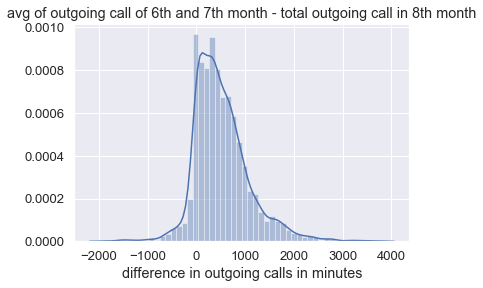

In [54]:
## 1. 
## plotting churned customer against outgoing calls

univariate_plot(hvc_df3[hvc_df3['churned']==1], 
                col='usage_diff_og_mou', 
                lbl = 'difference in outgoing calls in minutes',
                title ='avg of outgoing call of 6th and 7th month - total outgoing call in 8th month'
                )

### Looking at the graph it can be said 
### There are more customer churning happening for the outgoing call being reduced in the range of 100-700

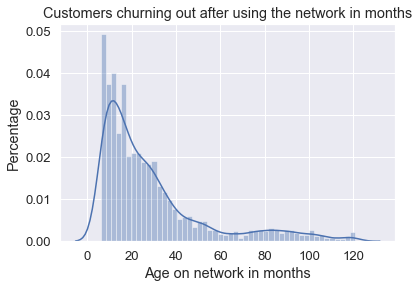

In [55]:
## 2.
## Examining Age  (aon) - how long they stayed before churning out

sns.distplot(hvc_df3[hvc_df3['churned']==1]['aon'], bins=50)
plt.xlabel('Age on network in months')
plt.ylabel('Percentage')
plt.title('Customers churning out after using the network in months')
plt.show()

### customers who are staying beyond 40 months are less likely to churn out.
### company should focus on customers which are between 5-40 months old omn this network

## Bivariate Analysis



In [56]:
hvc_df3['service_type'].unique()

array(['none', 'sachet', 'monthly'], dtype=object)

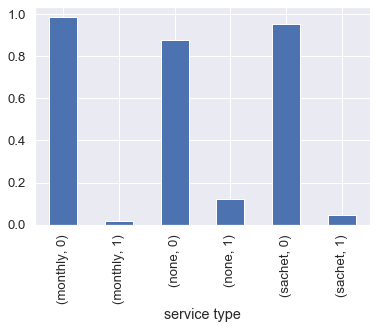

In [57]:
## 1. Service type

(hvc_df3[['service_type', 'churned']].groupby(['service_type', 'churned']).size()/
 hvc_df3.groupby(['service_type']).size()).plot.bar()

plt.xlabel("service type")
plt.show()

In [58]:
(hvc_df3[['service_type', 'churned']].groupby(['service_type', 'churned']).size()/
 hvc_df3.groupby(['service_type']).size())

service_type  churned
monthly       0         0.98516172
              1         0.01483828
none          0         0.87946355
              1         0.12053645
sachet        0         0.95614035
              1         0.04385965
dtype: float64

### Looking at data and bar chart it can be concluded around 12% customers are churning out which are not using any service pack (2g, 3g, fb or night pack)

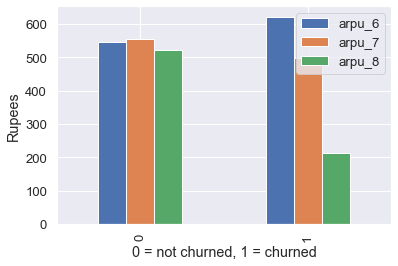

In [59]:
## 2. Average revenue

hvc_df3.groupby('churned')['arpu_6','arpu_7','arpu_8'].mean().plot.bar()
plt.xlabel('0 = not churned, 1 = churned')
plt.ylabel('Rupees')
plt.show()

## This is very clear that customers for whom revenues are declining in 7th and 8th months are churning out

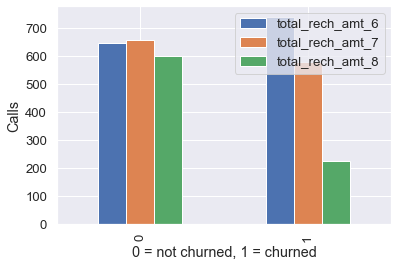

In [60]:
## 3. Recharge 

hvc_df3.groupby('churned')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot.bar()
plt.xlabel('0 = not churned, 1 = churned')
plt.ylabel('Calls')
plt.show()


## Like Revenue if recharge amount is declining in 7th and 8th month, customers are most likely to churn out

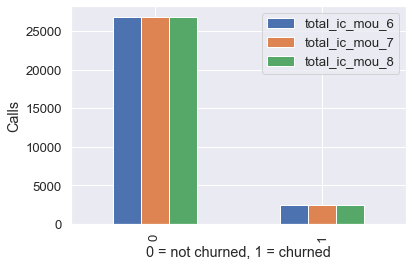

In [61]:
## 4 Incoming mins

hvc_df3.groupby('churned')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].count().plot.bar()
plt.xlabel('0 = not churned, 1 = churned')
plt.ylabel('Calls')
plt.show()

## Again customers which are low in usage are churning out, however point to note is they are low even in good months (6 and 7)

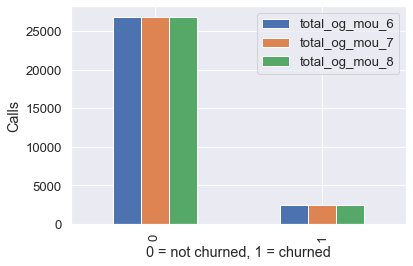

In [62]:
## 5 outgoing mins

hvc_df3.groupby('churned')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].count().plot.bar()
plt.xlabel('0 = not churned, 1 = churned')
plt.ylabel('Calls')
plt.show()

## Very similar to incoming, so customers which are not using much for incoming/outgoing are churning out.

In [ ]:
## Data Prep for Models

# Before moving towards model building Need to fix data imbalance (churn/non churn ratio is imbalance)
# for PCA to work we need to standardise the values as well


In [ ]:
## Data has to be numeric for PCA 

In [63]:
## saving the data
hvc_df4 = hvc_df3

In [64]:
hvc_df4.service_type.unique()

array(['none', 'sachet', 'monthly'], dtype=object)

In [65]:
## convert categorical values in dummies

cat_cols = ['service_type','user_type']

for colms in cat_cols:
    # add dummy
    dummies = pd.get_dummies(hvc_df4[colms],prefix=colms,drop_first=True)
    hvc_df4 = pd.concat([hvc_df4,dummies],axis=1)



In [66]:
## drpop the columns now
hvc_df4 = hvc_df4.drop(cat_cols,axis=1)


In [67]:
## dropping the mobile number as well

hvc_df4 = hvc_df4.drop(['mobile_number'],axis=1)



In [76]:
hvc_df4.shape

(29361, 169)

In [77]:
hvc_df4.head(3)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_type_none,service_type_sachet,user_type_3g,user_type_both
6,429.02300000,190.70400000,255.11400000,71.03000000,45.03000000,76.66000000,262.73000000,49.24000000,92.08000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,71.03000000,45.03000000,76.14000000,252.23000000,48.71000000,80.63000000,10.38000000,0.00000000,0.00000000,0.11000000,0.00000000,0.00000000,333.64000000,93.74000000,156.78000000,0.00000000,0.00000000,0.51000000,0.00000000,0.53000000,11.45000000,0.00000000,0.00000000,0.00000000,0.00000000,0.53000000,11.96000000,0.00000000,0.00000000,0.00000000,0.11000000,0.53000000,0.00000000,0.00000000,0.00000000,0.00000000,333.76000000,94.81000000,168.74000000,1857.99000000,1427.04000000,1896.43000000,248.64000000,336.96000000,265.28000000,20.24000000,22.69000000,2.51000000,2126.89000000,1786.71000000,2164.23000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,2128.41000000,1788.06000000,2167.11000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11000000,0.58000000,0.28000000,15.00000000,10.00000000,11.00000000,499.00000000,222.00000000,294.00000000,90.00000000,37.00000000,50.00000000,37.00000000,24.00000000,10.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000

In [68]:
hvc_df5=hvc_df4

In [79]:
hvc_df5.dtypes

arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_6        float64
loc_og_t2c_mou_7        float64
loc_og_t2c_mou_8        float64
loc_og_mou_6            float64
loc_og_mou_7            float64
loc_og_mou_8            float64
std_og_t2t_mou_6        float64
std_og_t

In [69]:
hvc_df5.churned.unique()

array([0, 1])

In [70]:
## Standardise the data



all_colmns = list(hvc_df5.columns)
for cols in all_colmns:
    hvc_df5[cols] = hvc_df5[cols].astype(float)

hvc_df5.head(3)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_type_none,service_type_sachet,user_type_3g,user_type_both
6,429.02300000,190.70400000,255.11400000,71.03000000,45.03000000,76.66000000,262.73000000,49.24000000,92.08000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,71.03000000,45.03000000,76.14000000,252.23000000,48.71000000,80.63000000,10.38000000,0.00000000,0.00000000,0.11000000,0.00000000,0.00000000,333.64000000,93.74000000,156.78000000,0.00000000,0.00000000,0.51000000,0.00000000,0.53000000,11.45000000,0.00000000,0.00000000,0.00000000,0.00000000,0.53000000,11.96000000,0.00000000,0.00000000,0.00000000,0.11000000,0.53000000,0.00000000,0.00000000,0.00000000,0.00000000,333.76000000,94.81000000,168.74000000,1857.99000000,1427.04000000,1896.43000000,248.64000000,336.96000000,265.28000000,20.24000000,22.69000000,2.51000000,2126.89000000,1786.71000000,2164.23000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,0.00000000,0.00000000,0.00000000,1.39000000,0.76000000,2.60000000,2128.41000000,1788.06000000,2167.11000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11000000,0.58000000,0.28000000,15.00000000,10.00000000,11.00000000,499.00000000,222.00000000,294.00000000,90.00000000,37.00000000,50.00000000,37.00000000,24.00000000,10.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000

In [ ]:
## checking again if any column still

In [71]:
hvc_df5.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_type_none,service_type_sachet,user_type_3g,user_type_both
count,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.00000000,29361.0000

In [72]:
# saving the data frame for normilzation etc.
hvc_df6 = hvc_df5

In [73]:
## PCA and logistic regression both needs mormalize data.
## keeping the data normalized

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
hvc_df6 = hvc_df6.apply(normalize)



print(hvc_df6.shape)

hvc_df6.head(3)


(29361, 169)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_0,night_pck_user_7_1.0,night_pck_user_7_0,night_pck_user_8_1.0,night_pck_user_8_0,fb_user_6_1.0,fb_user_6_0,fb_user_7_1.0,fb_user_7_0,fb_user_8_1.0,fb_user_8_0,churned,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_type_none,service_type_sachet,user_type_3g,user_type_both
6,0.14321275,0.09788525,0.07736466,0.03035401,0.01778753,0.03450079,0.06590609,0.01207940,0.02352983,0.00226598,0.01640971,0.00283289,0.00000000,0.00000000,0.00000000,0.02169060,0.01453078,0.02751428,0.09715241,0.01853649,0.03458749,0.02921968,0.00000000,0.00000000,0.06629321,0.08329650,0.07965259,0.10029068,0.03313141,0.06315915,0.00000000,0.00000000,0.00013399,0.00000000,0.00013096,0.00299415,0.00000000,0.00000000,0.00000000,0.00000000,0.00012368,0.00304806,0.25110779,0.27631282,0.25178331,0.00032507,0.00130919,0.00000000,0.00000000,0.00000000,0.00000000,0.07678504,0.02164385,0.04095969,0.56174547,0.50230024,0.65835920,0.07606391,0.12940788,0.10201743,0.01997612,0.02254705,0.00328079,0.63441341,0.59620396,0.72368236,0.00000000,0.00000000,0.00000000,0.00073071,0.00038047,0.00157696,0.00000000,0.00000000,0.00000000,0.00069187,0.00037950,0.00189369,0.61778459,0.56518716,0.71152167,0.98527122,0.98085366,0.98122411,0.00000000,0.00000000,0.00000000,0.00031954,0.00164595,0.00080997,0.15463918,0.11764706,0.13414634,0.12105774,0.05223529,0.07350000,0.04500000,0.01761905,0.02942908,0.02466667,0.01600000,0.00666667,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01016331,0.00384415,0.00746036,0.00746022,0.00301810,0.00756354,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,

In [74]:
hvc_df6.churned.unique()

array([0., 1.])

In [75]:
print ((sum(hvc_df6['churned'])/len(hvc_df6['churned'].index))*100)

8.524914001566703


In [76]:
## As we know churning data is higly imbalance, we need to treat this data

## We can use SMOTE to counter the imbalance issue
## I have installed this  using pip install imbalanced-learn

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



In [77]:
# Split data into X and Y 
X = hvc_df6.drop(['churned'],axis=1)

y = hvc_df6['churned']

y.head()

6    0.00000000
8    0.00000000
13   0.00000000
16   0.00000000
17   0.00000000
Name: churned, dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

##To find out if SMOTE is helping with class imbalance
## lets print them

print("Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train==0)))

##Apply the smote 
sm = SMOTE(random_state=100)

X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

print('After SMOTE, the shape of X: {}'.format(X_train_bal.shape))
print('After SMOTE, the shape of y: {} \n'.format(y_train_bal.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_bal==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_bal==0)))

Before SMOTE, counts of label '1': 1748
Before SMOTE, counts of label '0': 18804 

After SMOTE, the shape of X: (37608, 168)
After SMOTE, the shape of y: (37608,) 

After SMOTE, counts of label '1': 18804
After SMOTE, counts of label '0': 18804


In [79]:

##test data should be balanced as well

print("Before SMOTE, counts of label '1': {}".format(sum(y_test==1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_test==0)))


## apply smote
X_test_bal, y_test_bal = sm.fit_sample(X_test, y_test)


print('After SMOTE, the shape of X: {}'.format(X_test_bal.shape))
print('After SMOTE, the shape of y: {} \n'.format(y_test_bal.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_test_bal==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_test_bal==0)))

Before SMOTE, counts of label '1': 755
Before SMOTE, counts of label '0': 8054 

After SMOTE, the shape of X: (16108, 168)
After SMOTE, the shape of y: (16108,) 

After SMOTE, counts of label '1': 8054
After SMOTE, counts of label '0': 8054


In [80]:
## converting balanced data into data frames

X_train_bal_df = pd.DataFrame(X_train_bal,columns=X.columns)
y_train_bal_df  = pd.DataFrame(y_train_bal,columns=['churned'])
X_test_bal_df = pd.DataFrame(X_test_bal,columns=X.columns)
y_test_bal_df = pd.DataFrame(y_test_bal,columns=['churned'])

# Step 6 : Creating Models

## First Model we will build based on PCA as it will help in identifying features as well

In [81]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [82]:
## apply PCA on training set

pca.fit(X_train_bal)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [83]:
pca.components_

array([[ 2.30185140e-03,  1.08171750e-02,  1.82650414e-02, ...,
         1.35599472e-01,  1.83173784e-02, -3.08328916e-01],
       [-1.08638203e-02,  1.68882061e-02,  4.20313462e-02, ...,
         2.64879557e-01, -6.35348789e-02, -2.56666130e-01],
       [-3.46892224e-02,  2.99235800e-02,  1.60750540e-02, ...,
        -1.17497477e-01,  8.16689431e-02,  2.22469678e-02],
       ...,
       [ 0.00000000e+00, -8.99887334e-18,  2.54506838e-17, ...,
        -6.10162519e-18, -4.73574322e-18,  2.96487251e-18],
       [-0.00000000e+00, -2.29872047e-17, -2.19360004e-17, ...,
        -6.62447750e-19, -5.02026958e-19,  2.42934204e-18],
       [ 0.00000000e+00,  2.88646493e-17, -1.86769821e-17, ...,
        -6.08954287e-18, -9.20568734e-18,  8.56531270e-19]])

In [84]:
colmns = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colmns})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.00230185,-0.01086382,arpu_6
1,0.01081717,0.01688821,arpu_7
2,0.01826504,0.04203135,arpu_8
3,-0.01292846,0.01386214,onnet_mou_6
4,-0.00898842,0.02538419,onnet_mou_7
5,-0.00132463,0.02995436,onnet_mou_8
6,-0.01148557,0.01076939,offnet_mou_6
7,-0.00603804,0.02658795,offnet_mou_7
8,0.00210038,0.02670416,offnet_mou_8
9,-0.00109071,-0.00003211,roam_ic_mou_6


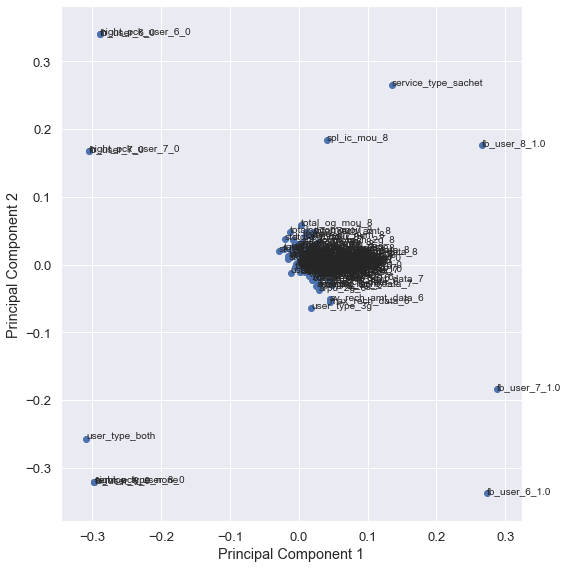

In [85]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [86]:
pca.explained_variance_ratio_

array([4.85217987e-01, 1.28258523e-01, 6.69211641e-02, 4.08616420e-02,
       3.56899327e-02, 2.73667522e-02, 2.37428743e-02, 2.08844255e-02,
       1.38011433e-02, 1.22285632e-02, 1.20596973e-02, 1.09797566e-02,
       9.95383414e-03, 8.06882284e-03, 6.78232082e-03, 6.12770023e-03,
       5.41917320e-03, 4.90644312e-03, 4.69982695e-03, 4.33284008e-03,
       3.91691030e-03, 3.85667931e-03, 3.57269149e-03, 3.10625376e-03,
       2.99869103e-03, 2.58242531e-03, 2.39356681e-03, 2.36275225e-03,
       2.26844224e-03, 2.10332579e-03, 1.99323822e-03, 1.91058397e-03,
       1.68669106e-03, 1.61816390e-03, 1.58087028e-03, 1.40129014e-03,
       1.35964802e-03, 1.25604755e-03, 1.22887921e-03, 1.14023304e-03,
       1.09708743e-03, 1.03534720e-03, 1.01382430e-03, 9.78021544e-04,
       9.27406815e-04, 8.85905889e-04, 8.37382431e-04, 7.94964776e-04,
       7.71937735e-04, 7.46187992e-04, 7.27423145e-04, 7.08670303e-04,
       6.90850988e-04, 6.48044305e-04, 6.33645972e-04, 6.15345517e-04,
      

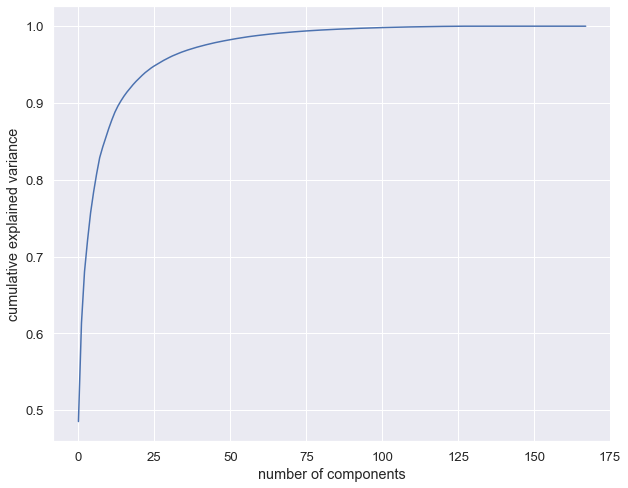

In [87]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### By looking the screeplot it is clear that around 15 feature can explain more than 90% of the variance
### So will choose 15 features

In [88]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

In [89]:
df_train_pca = pca_final.fit_transform(X_train_bal)
df_train_pca.shape

(37608, 15)

In [90]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

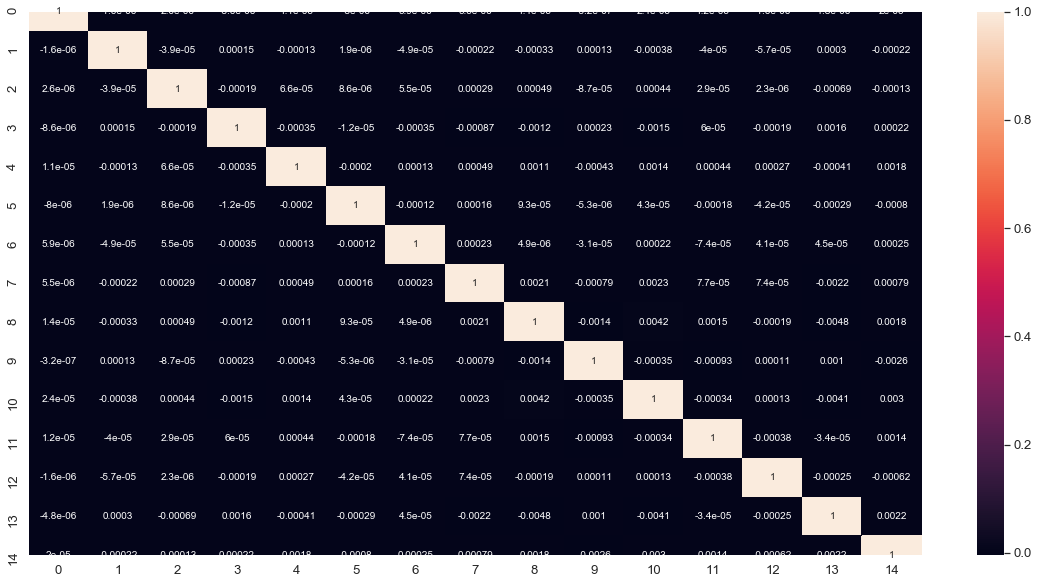

In [91]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [92]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.004151373347420453 , min corr:  -0.004788936447515782


### Looking at the heatmap and data, PCA has done good to remove multi multicollinearity

In [103]:
#Applying selected components to the test data - 15 components
df_test_pca = pca_final.transform(X_test_bal)
df_test_pca.shape

(16108, 15)

## Model 1 : Logistic regression

## we will use Logistic regression on the data gain after PCA.


In [94]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_pca = LogisticRegression()
model_pca = lr_pca.fit(df_train_pca,y_train_bal)

In [95]:
pred_res = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test_bal, pred_res))

'0.88'

In [96]:
confusion = metrics.confusion_matrix(y_test_bal,  pred_res.round())
confusion

array([[6470, 1584],
       [1735, 6319]])

In [97]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test_bal,  pred_res.round()))

# precision
print("precision", metrics.precision_score(y_test_bal,  pred_res.round()))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_bal,  pred_res.round()))

accuracy 0.7939533151229203
precision 0.7995697836264709
recall 0.7845790911348398


In [98]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# specificity ->  % of Non Churned customer  correctly classified by this model
print("specificity = {}%".format("{:2.4}".format(TN / float(TN+FP))))

specificity = 0.7996%


In [99]:
# sensitivity  -> % of Churned customer  correctly classified by this model
print("sensitivity = {}%".format("{:2.4}".format(TP / float(TP+FN))))

sensitivity = 0.7885%


###  Getting close to 80% from this model to correctly classify the churned customer

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

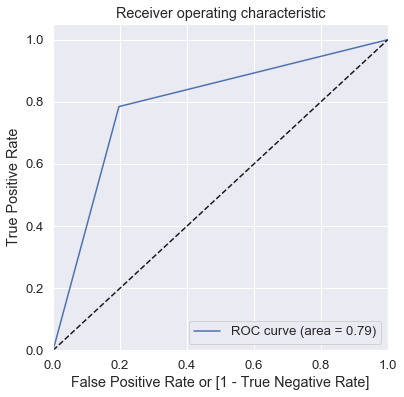

(array([0.        , 0.19667246, 1.        ]),
 array([0.        , 0.78457909, 1.        ]),
 array([2., 1., 0.]))

In [101]:
draw_roc(y_test_bal, pred_res.round())

## First Model seems to be good model with around 80% accuracy and can be used to predecit the churning customers


## Model 2 : Logistic regression with Ridge and Lasso Regression

## we will use same data wich was gain after PCA.

In [102]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, y_train_bal) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01290808,0.00259956,0.00119891,0.00011433,0.00010000,{'alpha': 0.0001},-0.38350582,-0.38874091,-0.34377421,-0.39983880,-0.39999234,-0.38317042,0.02070757,1,-0.31980120,-0.31835917,-0.32791144,-0.31651591,-0.31686048,-0.31988964,0.00417749
1,0.01281481,0.00209436,0.00146961,0.00046066,0.00100000,{'alpha': 0.001},-0.38350584,-0.38874093,-0.34377422,-0.39983882,-0.39999237,-0.38317044,0.02070757,2,-0.31980122,-0.31835919,-0.32791145,-0.31651592,-0.31686049,-0.31988965,0.00417749
2,0.01224818,0.00198410,0.00134687,0.00030189,0.01000000,{'alpha': 0.01},-0.38350606,-0.38874112,-0.34377436,-0.39983905,-0.39999263,-0.38317064,0.02070761,3,-0.31980137,-0.31835934,-0.32791160,-0.31651603,-0.31686060,-0.31988979,0.00417750
3,0.00825133,0.00037837,0.00089669,0.00005464,0.05000000,{'alpha': 0.05},-0.38350700,-0.38874194,-0.34377499,-0.39984008,-0.39999381,-0.38317157,0.02070777,4,-0.31980202,-0.31836003,-0.32791224,-0.31651649,-0.31686106,-0.31989037,0.00417756
4,0.00788908,0.00013507,0.00092134,0.00013932,0.10000000,{'alpha': 0.1},-0.38350819,-0.38874298,-0.34377578,-0.39984137,-0.39999529,-0.38317272,0.02070798,5,-0.31980285,-0.31836089,-0.32791304,-0.31651708,-0.31686164,-0.31989110,0.00417762


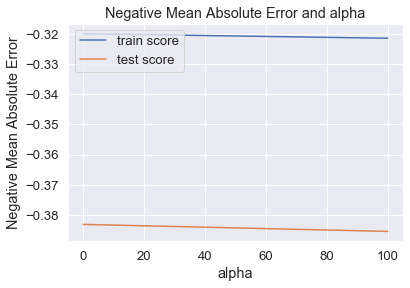

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

###  Using PCA we have already taken 15 features, we can see the train and test score have liner trend
### Increasing alpha means we are keeping the model more simple (also mean more general)
### Test score is getting better with increasing alpha, which is what we expect more general model to do

## Lasso Model

In [107]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, y_train_bal) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01689601,0.00229035,0.00134697,0.00010961,0.00010000,{'alpha': 0.0001},-0.38368869,-0.38888782,-0.34394097,-0.40008848,-0.40032942,-0.38338707,0.02074765,1,-0.32002195,-0.31858377,-0.32811105,-0.31666334,-0.31701005,-0.32007803,0.00419137
1,0.01322508,0.00475678,0.00095468,0.00002899,0.00100000,{'alpha': 0.001},-0.38576957,-0.39055145,-0.34559637,-0.40251640,-0.40379410,-0.38564558,0.02117553,2,-0.32221097,-0.32082189,-0.33006428,-0.31823636,-0.31834732,-0.32193616,0.00433478
2,0.01281257,0.00200231,0.00108385,0.00012616,0.01000000,{'alpha': 0.01},-0.42091321,-0.42270737,-0.36960944,-0.43919416,-0.44172916,-0.41883067,0.02600426,3,-0.34691558,-0.34607146,-0.35416600,-0.33961919,-0.33879675,-0.34511380,0.00558930
3,0.00926027,0.00036807,0.00092111,0.00001694,0.05000000,{'alpha': 0.05},-0.53675006,-0.53523520,-0.46536934,-0.57338707,-0.57425344,-0.53699902,0.03961304,4,-0.43668455,-0.43710921,-0.45058086,-0.43153741,-0.42929927,-0.43704226,0.00739843
4,0.00912929,0.00060203,0.00091476,0.00004214,0.10000000,{'alpha': 0.1},-0.56767636,-0.56726324,-0.49728614,-0.60864733,-0.60871050,-0.56991671,0.04072414,5,-0.46264515,-0.46361225,-0.48047299,-0.45690912,-0.45601092,-0.46393009,0.00880258


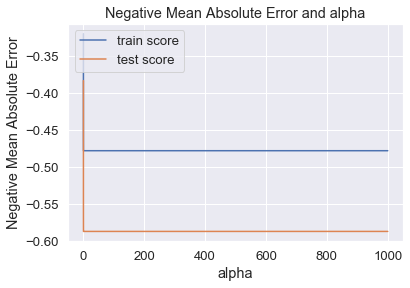

In [109]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Similar to ridge, as data is already optimized by PCA there is no gain here
### as lasso minimizes the coeff and sometime getting to 0. here features are already optimized to no gain here

## Model 3 : Random Forest

## we will use same data wich was gain after PCA.

In [110]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Create the random forest object with default parameters.
rfc_default = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [111]:
rfc_default.fit(df_train_pca,y_train_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [112]:
# Making predictions on test data
predictions = rfc_default.predict(df_test_pca)

In [113]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [114]:
# Let's check the report of our default model
print(classification_report(y_test_bal,predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80      8054
         1.0       0.91      0.60      0.73      8054

    accuracy                           0.77     16108
   macro avg       0.81      0.77      0.76     16108
weighted avg       0.81      0.77      0.76     16108



In [115]:
# Printing confusion matrix
print(confusion_matrix(y_test_bal,predictions))

[[7556  498]
 [3189 4865]]


In [116]:
# Accuracy on testing data
print(accuracy_score(y_test_bal,predictions))

0.7711075242115719


####  Tuning with max depth

In [117]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 50, 10)}

# instantiate the model
rf_maxdepth = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf_maxdepth = GridSearchCV(rf_maxdepth, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy", n_jobs = -1)

rf_maxdepth.fit(df_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                         

In [118]:
# scores of GridSearch CV
scores = rf_maxdepth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.95398984,0.32439570,0.14934196,0.05188767,5,{'max_depth': 5},0.57232119,0.57418240,0.55623504,0.57306209,0.57425874,0.57001189,0.00692628,5,0.57375523,0.57412085,0.56305258,0.57805697,0.57323761,0.57244465,0.00499730
1,23.60165248,0.55437530,0.19303923,0.07739059,15,{'max_depth': 15},0.83448551,0.84139856,0.83621377,0.83552719,0.83167132,0.83585927,0.00317320,4,0.86392342,0.86565180,0.86176295,0.86322997,0.86409413,0.86373245,0.00126354
2,25.52580109,2.22422681,0.10698314,0.00091728,25,{'max_depth': 25},0.90733847,0.92488700,0.92448817,0.91729823,0.92434517,0.91967141,0.00678205,3,0.96882271,0.97227947,0.97261185,0.97264599,0.97347692,0.97196739,0.00162117
3,23.94298620,0.21778245,0.14874859,0.04968321,35,{'max_depth': 35},0.92448817,0.94137198,0.94097315,0.93445021,0.93857200,0.93597110,0.00624701,2,0.99800572,0.99840457,0.99754038,0.99817197,0.99850434,0.99812540,0.00034067
4,21.24583154,3.05671380,0.10681124,0.00146717,45,{'max_depth': 45},0.92462111,0.94442967,0.94589205,0.93790719,0.93963569,0.93849714,0.00753748,1,0.99996676,1.00000000,1.00000000,1.00000000,0.99996676,0.99998671,0.00001628


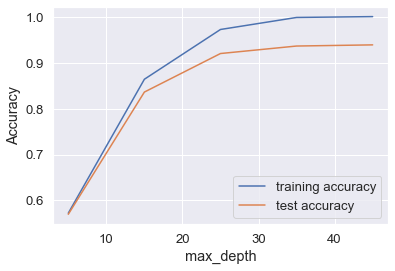

In [119]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 25 seems to be best value as it is giving accuracy more than 90% 

In [ ]:
## n estimater


In [120]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(30, 150, 30)}

# instantiate the model with a max_depth
rf = RandomForestClassifier(max_depth = 22,class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score = True,
                   scoring="accuracy", n_jobs = -1)
rf.fit(df_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=22,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                           

In [121]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.59045739,0.35664658,0.10890994,0.00363888,30,{'n_estimators': 30},0.89258176,0.90707259,0.90787025,0.89921553,0.90612950,0.90257393,0.00586606,4,0.95240311,0.94944492,0.95246959,0.95087579,0.95203909,0.95144650,0.00115282
1,14.33305292,1.10363566,0.10856600,0.00171632,60,{'n_estimators': 60},0.89630417,0.91411859,0.91079500,0.90253956,0.90719319,0.90619010,0.00626307,2,0.95060826,0.95433092,0.95562720,0.95173995,0.95439891,0.95334105,0.00186317
2,22.61426578,1.55915803,0.10907669,0.00190468,90,{'n_estimators': 90},0.89391119,0.91398564,0.91066206,0.90240659,0.90971945,0.90613699,0.00718746,3,0.95180483,0.95512863,0.95622549,0.95197261,0.95350151,0.95372661,0.00173381
3,21.62662716,3.57803408,0.12792916,0.04109648,120,{'n_estimators': 120},0.89803244,0.91292210,0.91358681,0.90453397,0.90985241,0.90778555,0.00583107,1,0.95366616,0.95369940,0.95426444,0.95443215,0.95419949,0.95405233,0.00031132


<Figure size 432x288 with 0 Axes>

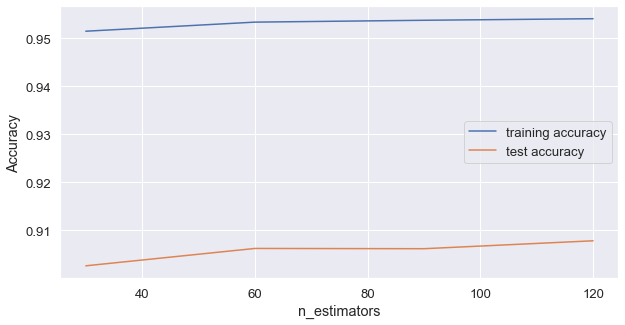

In [122]:
# plotting accuracies with n_estimators
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### n_estimators = 60  seems to be best value, looking at the graph above

In [ ]:
## max_features

In [123]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4,8,10]}

# instantiate the model
rf = RandomForestClassifier(max_depth=22,class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score = True,
                   scoring="accuracy", n_jobs = -1)
rf.fit(df_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=22,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                           

In [124]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.75823059,0.32301791,0.13743124,0.04117632,2,{'max_features': 2},0.89431002,0.91132677,0.90880085,0.90027922,0.90985241,0.90491386,0.00655049,2,0.95127302,0.95409825,0.95406501,0.95330209,0.95576162,0.95370000,0.00145538
1,28.65075970,1.28610178,0.10830646,0.00138499,4,{'max_features': 4},0.89377825,0.91305504,0.91172560,0.90347028,0.90679431,0.90576470,0.00690914,1,0.95173835,0.95346673,0.95369940,0.95320238,0.95340180,0.95310173,0.00069992
2,51.32791257,0.78660213,0.16874123,0.04941599,8,{'max_features': 8},0.89524063,0.91132677,0.90853496,0.89894961,0.90160883,0.90313216,0.00597382,3,0.94947816,0.95240311,0.95037559,0.94758534,0.94911424,0.94979129,0.00158655
3,57.74428697,8.22354778,0.10764966,0.00077117,10,{'max_features': 10},0.89218293,0.91079500,0.90614198,0.89815184,0.90160883,0.90177612,0.00641239,4,0.94924550,0.95087416,0.94957788,0.94811713,0.94984545,0.94953202,0.00089283


<Figure size 432x288 with 0 Axes>

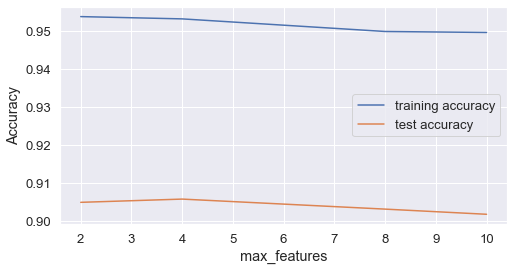

In [125]:
# plotting accuracies with max_features
plt.figure()
plt.figure(figsize=(8,4))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### max_features = 4 seems to be best value here

### Tune min_samples_leaf

In [126]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score = True,
                   scoring="accuracy", n_jobs = -1)
rf.fit(df_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                         

In [127]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.47811098,0.42037658,0.14957705,0.05037891,50,{'min_samples_leaf': 50},0.71324116,0.70845520,0.69768679,0.70589017,0.70296503,0.70564767,0.00521870,1,0.71996942,0.71212524,0.71106162,0.71678798,0.71549174,0.71508720,0.00322090
1,16.49135413,0.18402644,0.14724188,0.04901733,150,{'min_samples_leaf': 150},0.62536559,0.62496676,0.61419835,0.62013030,0.62731020,0.62239424,0.00473099,2,0.62969487,0.62361231,0.62165127,0.62698175,0.63010603,0.62640925,0.00332417
2,14.96069808,0.34402557,0.12859321,0.04024996,250,{'min_samples_leaf': 250},0.59040149,0.58481787,0.58096251,0.58010903,0.59061295,0.58538077,0.00447688,3,0.59260121,0.58269627,0.58525560,0.58397314,0.59042111,0.58698947,0.00384198
3,13.54319220,0.30797586,0.10998645,0.00276467,350,{'min_samples_leaf': 350},0.56514225,0.56527519,0.56248338,0.56202633,0.56388778,0.56376299,0.00133102,4,0.56860334,0.56371734,0.56488068,0.56492837,0.56197029,0.56482000,0.00217558
4,11.18285737,2.86603604,0.10715652,0.00122627,450,{'min_samples_leaf': 450},0.54825844,0.54812550,0.54187716,0.54514027,0.54527323,0.54573492,0.00234658,5,0.55032241,0.54520375,0.54733098,0.54531858,0.54511915,0.54665897,0.00200787


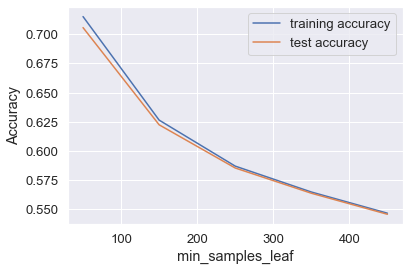

In [128]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_leaf =150 seems best value here

In [ ]:
## min samples split

In [129]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 1000, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score = True,
                   scoring="accuracy",n_jobs = -1)
rf.fit(df_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                         

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.44746828,1.30241078,0.12848916,0.04171388,100,{'min_samples_split': 100},0.79500133,0.79766020,0.78928476,0.79377742,0.78673049,0.79249084,0.00395324,1,0.81994948,0.81160673,0.81260387,0.81596703,0.81400605,0.81482663,0.00295045
1,23.79648967,2.03661592,0.10792837,0.00159878,200,{'min_samples_split': 200},0.73172029,0.72879553,0.71470354,0.72397288,0.71772371,0.72338319,0.00642673,2,0.74263777,0.73309845,0.73336436,0.73749460,0.73686310,0.73669165,0.00346446
2,28.35370030,3.02221464,0.10866418,0.00145664,300,{'min_samples_split': 300},0.69529380,0.69064079,0.68359479,0.68461641,0.68860524,0.68855021,0.00423983,3,0.70441401,0.69278070,0.69580536,0.69707847,0.69983714,0.69798314,0.00393497
3,24.38129325,3.11160829,0.14828300,0.08105736,400,{'min_samples_split': 400},0.66976868,0.66511566,0.66006381,0.66241191,0.66227895,0.66392780,0.00333088,4,0.67692615,0.66685502,0.67057768,0.67009007,0.67108718,0.67110722,0.00326363
4,19.31745114,0.25089185,0.14895244,0.05068228,500,{'min_samples_split': 500},0.65541080,0.64517416,0.63812816,0.64632363,0.64858396,0.64672414,0.00557442,5,0.66007445,0.64431962,0.64531676,0.65257420,0.65154386,0.65076578,0.00568809


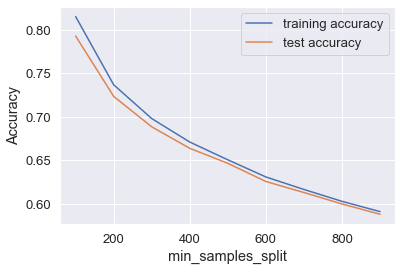

In [131]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### min_samples_split = 200-300 seems best value looking at graph

In [ ]:
## find combination of hyper parameter

In [134]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [25,30,35, 40],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(100, 400, 100),
    'n_estimators': [30,60,90], 
    'max_features': [3,4,5]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
# Instantiate the grid search model, Uncomment it to test it
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [135]:
# Fit the grid search to the data
## it will take some time as it is for all permutation and combination

grid_search.fit(df_train_pca, y_train_bal)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 76.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                         

In [136]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7272387470184078 using {'max_depth': 40, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 90}


In [137]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=40,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=90)

In [138]:
# fit
rfc.fit(df_train_pca,y_train_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
# predict
predictions = rfc.predict(df_test_pca)

In [140]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [141]:
print(classification_report(y_test_bal,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82      8054
         1.0       0.85      0.74      0.80      8054

    accuracy                           0.81     16108
   macro avg       0.81      0.81      0.81     16108
weighted avg       0.81      0.81      0.81     16108



In [142]:
confusion = confusion_matrix(y_test_bal,predictions)
print (confusion)

TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



[[7035 1019]
 [2058 5996]]


In [143]:
print(accuracy_score(y_test_bal,predictions))

0.8089769058852744


In [144]:

# specificity (% of Non Churn correctly classified)
print("specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

# sensitivity 
print("sensitivity", TP / float(TP+FN))

specificity = 0.8547
sensitivity 0.7736720554272517


###  As per Problem Statement we need to select model which can predict churning customer better
###  We will use high sensitivity and good accuracy model

#### AS we can see
### Logistic regresion is giving 79% Sensitivity and 80% accuracy
### Random Forest is giving 77% sensitivity and 80% accuracy

# We will suggest here to use Logistic Regression model


###  .

## Models without PCA. So will use data set before PCA was applied
## this will allow to find best features to use for prediction and explaining to busines

## Model 1: Decision Tree  (they are best for exlaining the feature to business)

In [145]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier


dt_default = DecisionTreeClassifier()


In [146]:
## getting the correct data (treated for class imbalance)

X_train = X_train_bal
y_train = y_train_bal

X_test = X_test_bal
y_test = y_test_bal

In [147]:
## training the model
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:

# Finding predictions
y_pred_dca = dt_default.predict(X_test)

#  classification data
print(classification_report(y_test, y_pred_dca))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      8054
         1.0       0.90      0.78      0.84      8054

    accuracy                           0.85     16108
   macro avg       0.85      0.85      0.85     16108
weighted avg       0.85      0.85      0.85     16108



In [149]:
#  confusion matrix and accuracy to see how good the model is
print(confusion_matrix(y_test,y_pred_dca))
print(' accuracy = ',accuracy_score(y_test,y_pred_dca))

[[7332  722]
 [1746 6308]]
 accuracy =  0.8467842066054134


In [150]:
## Plotting the tree

# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz



In [151]:
# Putting features
features = list(hvc_df6.columns[1:])

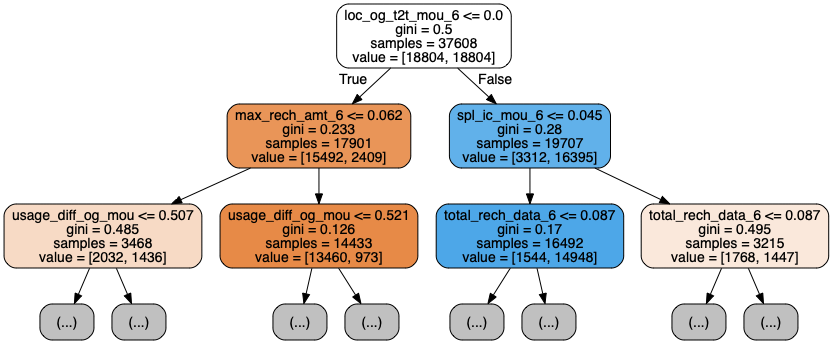

In [152]:
#  tree plot with max_depth=2
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
## like previous random forest, we will tune this to make it better

In [153]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 20, 4)}

# instantiate the random forest model
dtc_depth = DecisionTreeClassifier(criterion = "gini")


# fit tree on training data
tree = GridSearchCV(dtc_depth, parameters, 
                    cv=n_folds, 
                    return_train_score = True,
                   scoring="accuracy")
tree.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 4)}, pre_dispatch='2*n_jobs

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


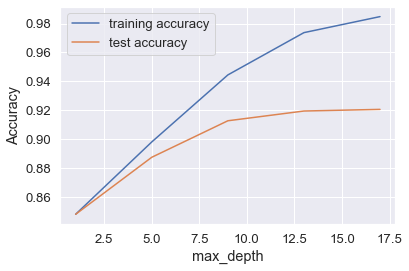

In [154]:
scores = tree.cv_results_
print (tree.best_estimator_)
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

####  max_depth=8 seems to be optimal value here as, it seems tree is overfitting after that


#### Tuning max_features

In [155]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4,8,16]}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini",max_depth = 20)


# fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                    return_train_score = True,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [2, 4, 8, 16]},
             pre_dispat

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=16, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


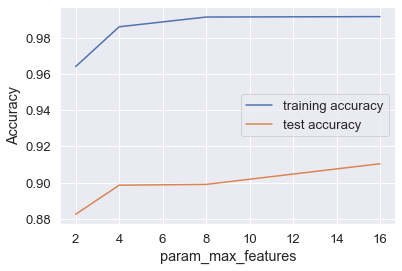

In [156]:
scores = tree.cv_results_
print (tree.best_estimator_)
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### max_features = 5, as after that there is no much gain


#### Tuning min_samples_leaf

In [157]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 300, 50)}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini")

# fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                    return_train_score = True,                    
                   scoring="accuracy")
tree.fit(X_train, y_train)
scores = tree.cv_results_

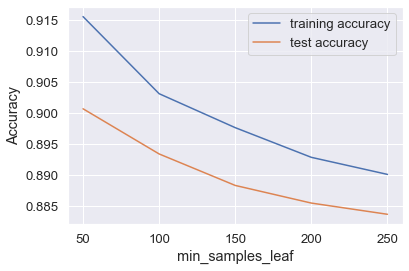

In [158]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Actually accuracy is decreesing for more leaf. so 50 seems to be good in this case

#### Tuning min_samples_split

In [159]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini")

# fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                    return_train_score = True,
                   scoring="accuracy")
tree.fit(X_train, y_train)
scores = tree.cv_results_

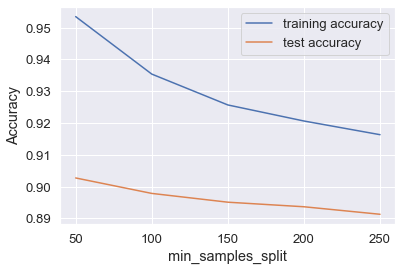

In [160]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### looking at graph 50 seems to be ideal value.


### Grid Search to Find Optimal Hyperparameters

In [161]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(4, 8, 2),
    'max_features': [4,6],
    'min_samples_leaf': range(100, 250, 50),
    'min_samples_split': range(100, 300, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs = 4)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['entropy', 'gini'],
                      

In [162]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


# printing the optimal accuracy score and hyperparameters
print('using',grid_search.best_params_)

best accuracy 0.8402984697884477
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
using {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 150, 'min_samples_split': 250}


In [163]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  max_depth=6, 
                                  min_samples_leaf=150,
                                  min_samples_split=250,
                                 max_features = 6)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [164]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# predict
predictions = clf_gini.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83      8054
         1.0       0.84      0.79      0.82      8054

    accuracy                           0.82     16108
   macro avg       0.82      0.82      0.82     16108
weighted avg       0.82      0.82      0.82     16108



In [165]:
confusion = confusion_matrix(y_test,predictions)
print (confusion)

TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[6861 1193]
 [1672 6382]]


In [166]:
print('accuracy', accuracy_score(y_test,predictions))
# specificity (% of Non Churn correctly classified)
print("specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

# sensitivity 
print("sensitivity", TP / float(TP+FN))

accuracy 0.8221380680407251
specificity = 0.8425
sensitivity 0.8040548458924177


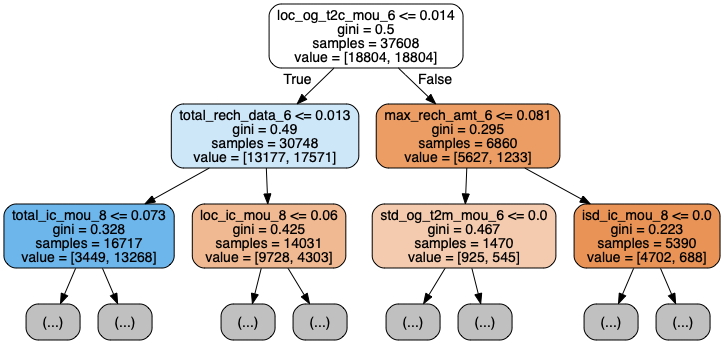

In [167]:
## Plotting the final tree 

# plotting tree with max_depth=2
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### This DecisionTree model giving a very good accuracy (94%) and Sensitivity (95%). 

### we will use this model to explain to business

## Important features to observe here

1. loc_og_t2t_mou_6    - local outgoing call within same operator in 6th month
2. total_rech_data_6   - total recharge data in 6th month
3. max_rech_amt_6      - maximum recharge amount in 6th month
4. total_ic_mou_8      - 8th month is strong indicator, total incoming dropping in 8th month
5. loc_ic_mou_8        - local incoming call in 8th months is key
6. std_og_t2m_mou_6    - is STD call is declining in 6th month
7. isd_ic_mou_8        - ISD incoming call in 8th month


## So our recomondation is that company should offer better deals for lcal outgoing and total data along with STD and ISD calls rate.

## Company should also  watch local and total incoming in 8th month to target which customer should be offered



## Model 2: Logistic Regression

In [168]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [169]:
## getting the correct data (treated for class imbalance)

X_train = X_train_bal
y_train = y_train_bal

X_test = X_test_bal
y_test = y_test_bal

In [170]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37608
Model:                            GLM   Df Residuals:                    37456
Model Family:                Binomial   Df Model:                          151
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12943.
Date:                Sun, 23 Feb 2020   Deviance:                       25887.
Time:                        19:27:38   Pearson chi2:                 8.11e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.717e+04   2622.320     -6.546      0.000   -2.23e+04    -1.2e+04
arpu_6                  -2.3569      0.770     -3.062      0.002      -3.866      -0.848
arpu_7                   4.5639      0.897      5.087      0.000       2.805       6.322
arpu_8                  11.2852      0.976     11.560      0.000       9.372      13.199
onnet_mou_6             27.4993     26.304      1.045      0.296     -24.056      79.055
onnet_mou_7            -54.2923     16.065     -3.379      0.001     -85.780     -22.805
onnet_mou_8             77.3325     20.018      3.863      0.000      38.097     116.568
offnet_mou_6            30.0844     24.735      1.216      0.224     -18.395      78.563
offnet_mou_7           -51.9337     16.042     -3.237      0.001     -83.376     -20.491
offnet_mou_8            63.4196     19.357      3.276      0.001      25.481     101.359
roam_ic_mou_6            0.7822      0.758      1.031      0.302      -0.704       2.269
roam_ic_mou_7            2.0561      0.826      2.488      0.013       0.436       3.676
roam_ic_mou_8            1.0943      0.798      1.371      0.170      -0.470       2.659
roam_og_mou_6          -13.5862     11.393     -1.193      0.233     -35.916       8.743
roam_og_mou_7           21.6543      5.931      3.651      0.000      10.029      33.279
roam_og_mou_8          -25.9369      8.060     -3.218      0.001     -41.735     -10.139
loc_og_t2t_mou_6      5940.2582   7729.101      0.769      0.442   -9208.502    2.11e+04
loc_og_t2t_mou_7     -1.684e+04   7021.244     -2.398      0.016   -3.06e+04   -3076.844
loc_og_t2t_mou_8     -1.676e+04   6426.161     -2.608      0.009   -2.94e+04   -4163.555
loc_og_t2m_mou_6      4703.9235   6127.747      0.768      0.443   -7306.239    1.67e+04
loc_og_t2m_mou_7     -1.429e+04   5953.785     -2.399      0.016    -2.6e+04   -2616.222
loc_og_t2m_mou_8      -1.41e+04   5413.471     -2.605      0.009   -2.47e+04   -3494.122
loc_og_t2f_mou_6       643.1081    838.500      0.767      0.443   -1000.322    2286.538
loc_og_t2f_mou_7     -1717.5121    715.056     -2.402      0.016   -3118.996    -316.028
loc_og_t2f_mou_8     -1559.0725    598.546     -2.605      0.009   -2732.202    -385.944
loc_og_t2c_mou_6        -3.1669      0.746     -4.246      0.000      -4.629      -1.705
loc_og_t2c_mou_7         0.0093      0.961      0.010      0.992      -1.874       1.893
loc_og_t2c_mou_8         3.4033      0.917      3.713      0.000       1.607       5.200
loc_og_mou_6          -6.18e+04   1.17e+04     -5.301      0.000   -8.46e+04    -3.9e+04
loc_og_mou_7          1961.7795   1.17e+04      0.167      0.867    -2.1e+04    2.49e+04
loc_og_mou_8          5.205e+04   1.02e+04      5.081      0.000     3.2e+04    7.21e+04
std_og_t2t_mou_6      4653.0164   1.42e+04      0.328    

In [171]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the  results
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False  True
 False False False False False  True False False  True False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False  True Fa

In [173]:
col = X_train.columns[rfe.support_]
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37608
Model:                            GLM   Df Residuals:                    37597
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15441.
Date:                Sun, 23 Feb 2020   Deviance:                       30881.
Time:                        19:40:57   Pearson chi2:                 9.74e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1030      0.162    -12.994      0.000      -2.420      -1.786
roam_og_mou_8          7.5251      0.332     22.695      0.000       6.875       8.175
loc_og_mou_8          -6.9907      0.371    -18.841      0.000      -7.718      -6.263
loc_ic_t2m_mou_8      10.8298      0.702     15.430      0.000       9.454      12.205
total_ic_mou_8       -17.6381      0.611    -28.890      0.000     -18.835     -16.442
total_rech_amt_8      -5.8010      0.255    -22.744      0.000      -6.301      -5.301
last_day_rch_amt_8    -5.2399      0.307    -17.081      0.000      -5.841      -4.639
total_rech_data_8     -6.6819      0.424    -15.750      0.000      -7.513      -5.850
vol_2g_mb_8           -5.5311      0.511    -10.835      0.000      -6.532      -4.531
sep_vbc_3g           -24.0142      2.503     -9.595      0.000     -28.920     -19.109
usage_diff_og_mou      7.0980      0.293     24.232      0.000       6.524       7.672
======================================================================================
"""

In [174]:
# Function to get vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [176]:
## get the original dataframe after cleaning and all the treatment.

df = hvc_df6

In [177]:
## get teh data for logistic regression

df_logistic = df[col]
df_logistic['churned'] = df['churned']
# getting  Vif value
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
3,total_ic_mou_8,5.48000000
2,loc_ic_t2m_mou_8,4.80000000
4,total_rech_amt_8,4.16000000
9,usage_diff_og_mou,2.84000000
1,loc_og_mou_8,2.76000000
5,last_day_rch_amt_8,1.90000000
6,total_rech_data_8,1.43000000
7,vol_2g_mb_8,1.20000000
0,roam_og_mou_8,1.13000000
8,sep_vbc_3g,1.05000000


In [178]:
## dropping the total_ic_mou_8 considering the highg VIF.
## any VIF less than 5 can be ok.

df_logistic = df_logistic.drop(['total_ic_mou_8'], axis=1)

In [179]:
col_list = df_logistic.columns.tolist()
col_list

['roam_og_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2m_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'vol_2g_mb_8',
 'sep_vbc_3g',
 'usage_diff_og_mou',
 'churned']

In [180]:
col_list.remove('churned')

In [181]:
## build the model again with one less feature
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col_list])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37608
Model:                            GLM   Df Residuals:                    37598
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16017.
Date:                Sun, 23 Feb 2020   Deviance:                       32034.
Time:                        19:52:58   Pearson chi2:                 3.15e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3216      0.161    -14.444      0.000      -2.637      -2.007
roam_og_mou_8          8.3360      0.329     25.306      0.000       7.690       8.982
loc_og_mou_8         -10.7728      0.380    -28.354      0.000     -11.517     -10.028
loc_ic_t2m_mou_8      -4.7528      0.442    -10.755      0.000      -5.619      -3.887
total_rech_amt_8      -7.7753      0.250    -31.098      0.000      -8.265      -7.285
last_day_rch_amt_8    -5.5447      0.317    -17.503      0.000      -6.166      -4.924
total_rech_data_8     -7.3248      0.429    -17.089      0.000      -8.165      -6.485
vol_2g_mb_8           -5.7999      0.516    -11.233      0.000      -6.812      -4.788
sep_vbc_3g           -24.1504      2.543     -9.498      0.000     -29.134     -19.167
usage_diff_og_mou      7.6467      0.291     26.233      0.000       7.075       8.218
======================================================================================
"""

In [182]:
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
3,total_rech_amt_8,4.08000000
8,usage_diff_og_mou,2.81000000
1,loc_og_mou_8,2.71000000
2,loc_ic_t2m_mou_8,2.17000000
4,last_day_rch_amt_8,1.90000000
5,total_rech_data_8,1.43000000
6,vol_2g_mb_8,1.20000000
0,roam_og_mou_8,1.13000000
7,sep_vbc_3g,1.05000000


In [ ]:
## with p-value as 0 and VIF is less than 5 we can chosee these features

In [183]:
final_col = df_logistic.drop(['churned'], axis=1).columns
final_col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'sep_vbc_3g', 'usage_diff_og_mou'], dtype='object')

In [184]:
## get teh final model

logsk.fit(X_train[final_col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
# Predict the result
y_pred = logsk.predict_proba(X_test[final_col])

In [218]:
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting mobile_number to index
y_test['customer_id'] = y_test.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)
# Renaming the column 
#y_pred_final.index.name = 'customer_id'
y_pred_final= y_pred_final.rename(columns={1 : 'churned_prob'})
y_pred_final.head()

,churned,churned_prob
0,0.00000000,0.02045600
1,0.00000000,0.96084751
2,0.00000000,0.41411989
3,0.00000000,0.11208331
4,0.00000000,0.26231008


In [219]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churned,churned_prob,predicted
0,0.00000000,0.02045600,0
1,0.00000000,0.96084751,1
2,0.00000000,0.41411989,0
3,0.00000000,0.11208331,0
4,0.00000000,0.26231008,0


In [ ]:
## data looks good, Let's evaluate

In [246]:
y_pred_final.dtypes

churned         float64
churned_prob    float64
predicted         int64
dtype: object

In [221]:
y_pred_df = y_pred_final

In [231]:
y_pred_df.dropna(subset=["churned_prob"], axis = 0 , inplace= True)

In [234]:
y_pred_df.shape

(16108, 3)

In [235]:

y_pred_df["churned"]=y_pred_df["churned"].astype(float)


In [245]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_df.churned, y_pred_df.predicted )
confusion

array([[6380, 1674],
       [1440, 6614]])

In [247]:
metrics.accuracy_score( y_pred_df.churned, y_pred_df.predicted)

0.8066799106034269

In [238]:
## confusion data
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [239]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8158567774936062

In [240]:
# Let us calculate specificity
TN / float(TN+FP)

0.7980212355212355

In [241]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20197876447876448


In [242]:
# positive predictive value 
print (TP / float(TP+FP))

0.7921529674695803


In [243]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8212068537372734


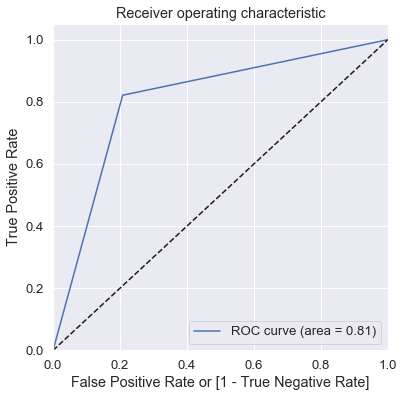

(array([0.        , 0.20784703, 1.        ]),
 array([0.        , 0.82120685, 1.        ]),
 array([2, 1, 0]))

In [248]:
draw_roc(y_pred_df.churned, y_pred_df.predicted)

In [249]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df.churned_prob.map( lambda x: 1 if x > i else 0)
y_pred_df.head()

,churned,churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00000000,0.02045600,0,1,0,0,0,0,0,0,0,0,0
1,0.00000000,0.96084751,1,1,1,1,1,1,1,1,1,1,1
2,0.00000000,0.41411989,0,1,1,1,1,1,0,0,0,0,0
3,0.00000000,0.11208331,0,1,1,0,0,0,0,0,0,0,0
4,0.00000000,0.26231008,0,1,1,1,0,0,0,0,0,0,0


In [250]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

def calculation_for_cutoffs(y_pred_df):
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix( y_pred_df.churned, y_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
calculation_for_cutoffs(y_pred_df)

                 prob   accuracy      sensi      speci
0.00000000 0.00000000 0.50000000 0.00000000 1.00000000
0.10000000 0.10000000 0.65445741 0.33039483 0.97851999
0.20000000 0.20000000 0.71436553 0.48125155 0.94747951
0.30000000 0.30000000 0.75471815 0.60156444 0.90787186
0.40000000 0.40000000 0.78544822 0.70573628 0.86516017
0.50000000 0.50000000 0.80667991 0.79215297 0.82120685
0.60000000 0.60000000 0.81853737 0.85895207 0.77812267
0.70000000 0.70000000 0.81686119 0.90998262 0.72373976
0.80000000 0.80000000 0.76055376 0.95021108 0.57089645
0.90000000 0.90000000 0.56034269 0.98485225 0.13583313


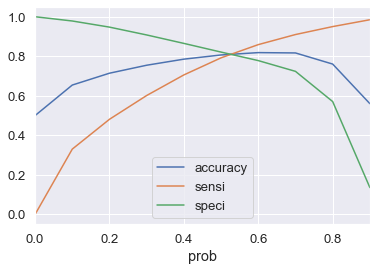

In [251]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.57 is the optimum value to take  as a cutoff.

In [256]:
y_pred_df['final_predicted'] = y_pred_df.churned_prob.map( lambda x: 1 if x > 0.57 else 0)
y_pred_df.head()

,churned,churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.00000000,0.02045600,0,1,0,0,0,0,0,0,0,0,0,0
1,0.00000000,0.96084751,1,1,1,1,1,1,1,1,1,1,1,1
2,0.00000000,0.41411989,0,1,1,1,1,1,0,0,0,0,0,0
3,0.00000000,0.11208331,0,1,1,0,0,0,0,0,0,0,0,0
4,0.00000000,0.26231008,0,1,1,1,0,0,0,0,0,0,0,0


In [257]:
metrics.accuracy_score( y_pred_df.churned, y_pred_df.final_predicted)

0.8178544822448472

In [258]:
metrics.confusion_matrix( y_pred_df.churned, y_pred_df.final_predicted )

array([[6786, 1268],
       [1666, 6388]])

In [259]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [260]:
print ('sensitivity = ', TP / float(TP+FN))
print ('specificity = ', TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print()
print ('false postive rate = ', FP/ float(TN+FP))

# positive predictive value 
print ('positive predictive value',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value', TN / float(TN+ FN))

sensitivity =  0.8158567774936062
specificity =  0.7980212355212355

false postive rate =  0.20197876447876448
positive predictive value 0.7921529674695803
Negative predictive value 0.8212068537372734


### With Sesitivity as 81% and acuracy as 81%, it is pretty good model
### Decision Tree and Logistic regression both are pretty good models with sensitivity and Acuracy as high as in 80-82% range.





### Here are the parameter which should be consdered for Logistic Regression

- 'roam_og_mou_8', 
- 'loc_og_mou_8', 
- 'loc_ic_t2m_mou_8', 
- 'total_rech_amt_8', 
- 'last_day_rch_amt_8', 
- 'total_rech_data_8', 
- 'vol_2g_mb_8', 
- 'sep_vbc_3g', 
- 'usage_diff_og_mou'



### Final Recomondation


#### All models are good for predictions, however feature exaplanation and corrective action can be taken from these 2 modesl as features are clearly visible

## Toal recharge amount, data mount, incoming and outgoing calls and 2g data usage in 8th months are strong features and they should be looked at carefully.

## A good offer which can bring the cost down for these features shuld be offered to custerms beibg predicted as churned in our model.
